## Decision Tree Classifier Micro Project
### Data obtained from Kaggle: Titanic extended dataset
### Dataset Link: https://www.kaggle.com/hesh97/titanicdataset-traincsv/downloads/titanicdataset-traincsv.zip/1

In [38]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix 
from sklearn.tree import DecisionTreeClassifier

In [39]:
data = pd.read_csv('titanic2.csv')

In [40]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [42]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data Visualization

In [43]:
data.groupby('Sex')['Sex'].count()


Sex
female    314
male      577
Name: Sex, dtype: int64

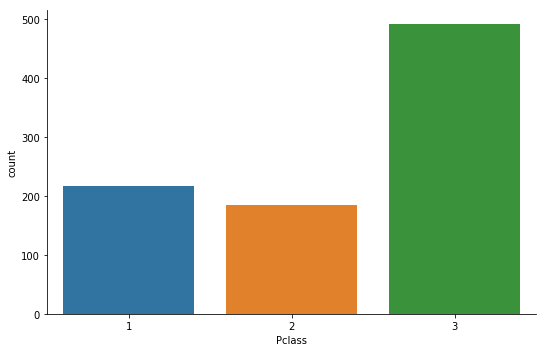

In [44]:
sn.catplot('Pclass', data=data, kind='count', aspect=1.5) ### use catplot instead of factorplot to avoid warning message


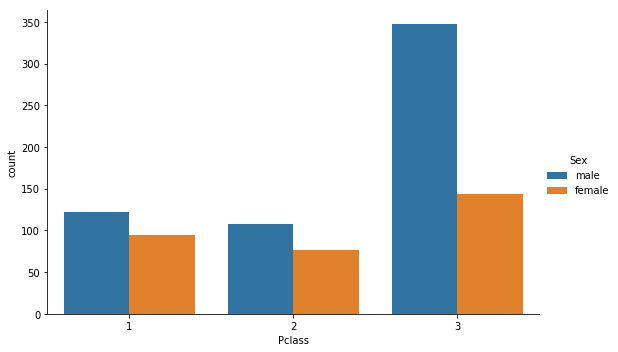

In [45]:
sn.catplot('Pclass', data=data, kind='count', hue='Sex', aspect=1.5) ### use catplot instead of factorplot to avoid warning message


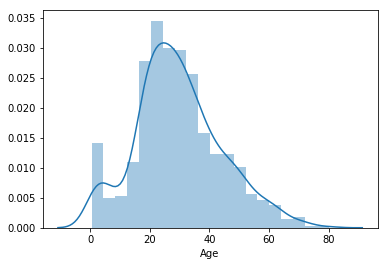

In [46]:
Age = data['Age'].dropna()
age_dist = sn.distplot(Age)

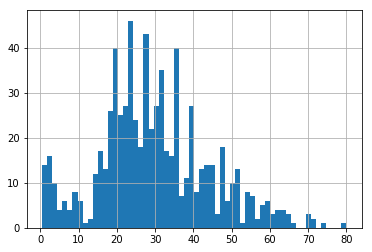

In [47]:
data['Age'].hist(bins=60)

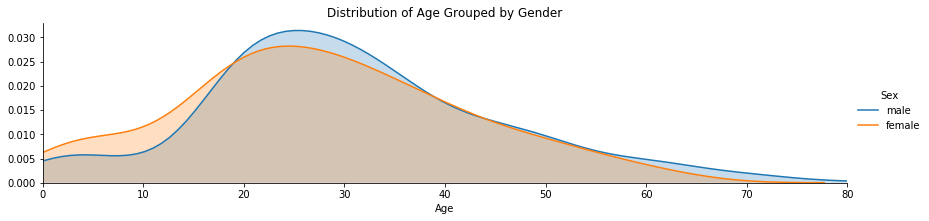

In [48]:
fig = sn.FacetGrid(data, hue='Sex', aspect=4)
fig.map(sn.kdeplot, 'Age', shade=True)
oldest = data['Age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

#### Data Cleaning

In [49]:
data.loc[:, data.isna().any()]
## Age, Cabin have NaN values. Cabin column will be dropped so no need for cleaning . We can take the mean of age and fill the NaN values with the mean of all ages

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S
3,35.0,C123,S
4,35.0,NaN,S
5,NaN,NaN,Q
6,54.0,E46,S
7,2.0,NaN,S
8,27.0,NaN,S
9,14.0,NaN,C


In [50]:
data.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [51]:
data.fillna(data.mean(),inplace=True)

#### Considering the 'Sex' and 'Boarded' columns are categorical, it is necessary to convert them to numerical data so we can use the data to train our model

In [52]:
A_Sex = pd.get_dummies(data['Sex'])

In [53]:
## Concat variables to original dataset
final_data = pd.concat([data, A_Sex],axis=1)
final_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


#### Train-Test Split

In [54]:
final_data.columns
## we need to drop the Sex and Boarded columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'female', 'male'],
      dtype='object')

In [55]:
X = final_data.drop(['PassengerId','Ticket','Survived','Name','Parch','Cabin','Sex','Embarked'],axis=1)
y = final_data['Survived']  ## Target variable


In [56]:
X.fillna(X.mean(), inplace=True)

In [57]:
X.head() 
## The features that will be used for training

,Pclass,Age,SibSp,Fare,female,male
0,3,22.0,1,7.2500,0,1
1,1,38.0,1,71.2833,1,0
2,3,26.0,0,7.9250,1,0
3,1,35.0,1,53.1000,1,0
4,3,35.0,0,8.0500,0,1


In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

#### Training the Model and Predictions

In [59]:
dtree= DecisionTreeClassifier() 

In [60]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [61]:
predictions = dtree.predict(X_test)

In [62]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       172
           1       0.67      0.74      0.70        96

   micro avg       0.78      0.78      0.78       268
   macro avg       0.76      0.77      0.76       268
weighted avg       0.78      0.78      0.78       268

